In [ ]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')
pyvista._wrappers['vtkPolyData'] = pyvista.PolyData

Topographic Map {#ref_topo_map_example}
===============

This is very similar to the `ref_texture_example`{.interpreted-text
role="ref"} example except it is focused on plotting aerial imagery from
a GeoTIFF on top of some topography mesh.


In [1]:
# sphinx_gallery_thumbnail_number = 4

import pyvista as pv
from pyvista import examples

# Load the elevation data as a surface
elevation = examples.download_crater_topo().warp_by_scalar()
# Load the topographic map from a GeoTiff
topo_map = examples.download_crater_imagery()

elevation

StructuredGrid (0x1e1af9061c0)
  N Cells:	1677401
  N Points:	1680000
  X Bounds:	1.810e+06, 1.831e+06
  Y Bounds:	5.640e+06, 5.658e+06
  Z Bounds:	7.339e+02, 2.787e+03
  Dimensions:	1400, 1200, 1
  N Arrays:	1

In [2]:
# Get system info
import pyvista as pv
print(pv.Report())


--------------------------------------------------------------------------------
  Date: Tue Nov 16 19:56:24 2021 Hora estándar de Montevideo

                OS : Windows
            CPU(s) : 8
           Machine : AMD64
      Architecture : 64bit
               RAM : 15.6 GiB
       Environment : Jupyter
        GPU Vendor : Intel
      GPU Renderer : Intel(R) HD Graphics 4600
       GPU Version : 4.3.0 - Build 20.19.15.5126

  Python 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]

           pyvista : 0.31.3
               vtk : 9.0.3
             numpy : 1.20.1
           imageio : 2.9.0
           appdirs : 1.4.4
            scooby : 0.5.7
            meshio : 4.4.6
        matplotlib : 3.3.4
         pyvistaqt : 0.5.0
             PyQt5 : 5.9.2
           IPython : 7.22.0
        ipyvtklink : 0.2.1
             scipy : 1.6.2
              tqdm : 4.59.0

  Intel(R) oneAPI Math Kernel Library Version 2021.2-Product Build 20210312
  for Intel(R) 64 architecture 

Let\'s inspect the imagery that we just loaded


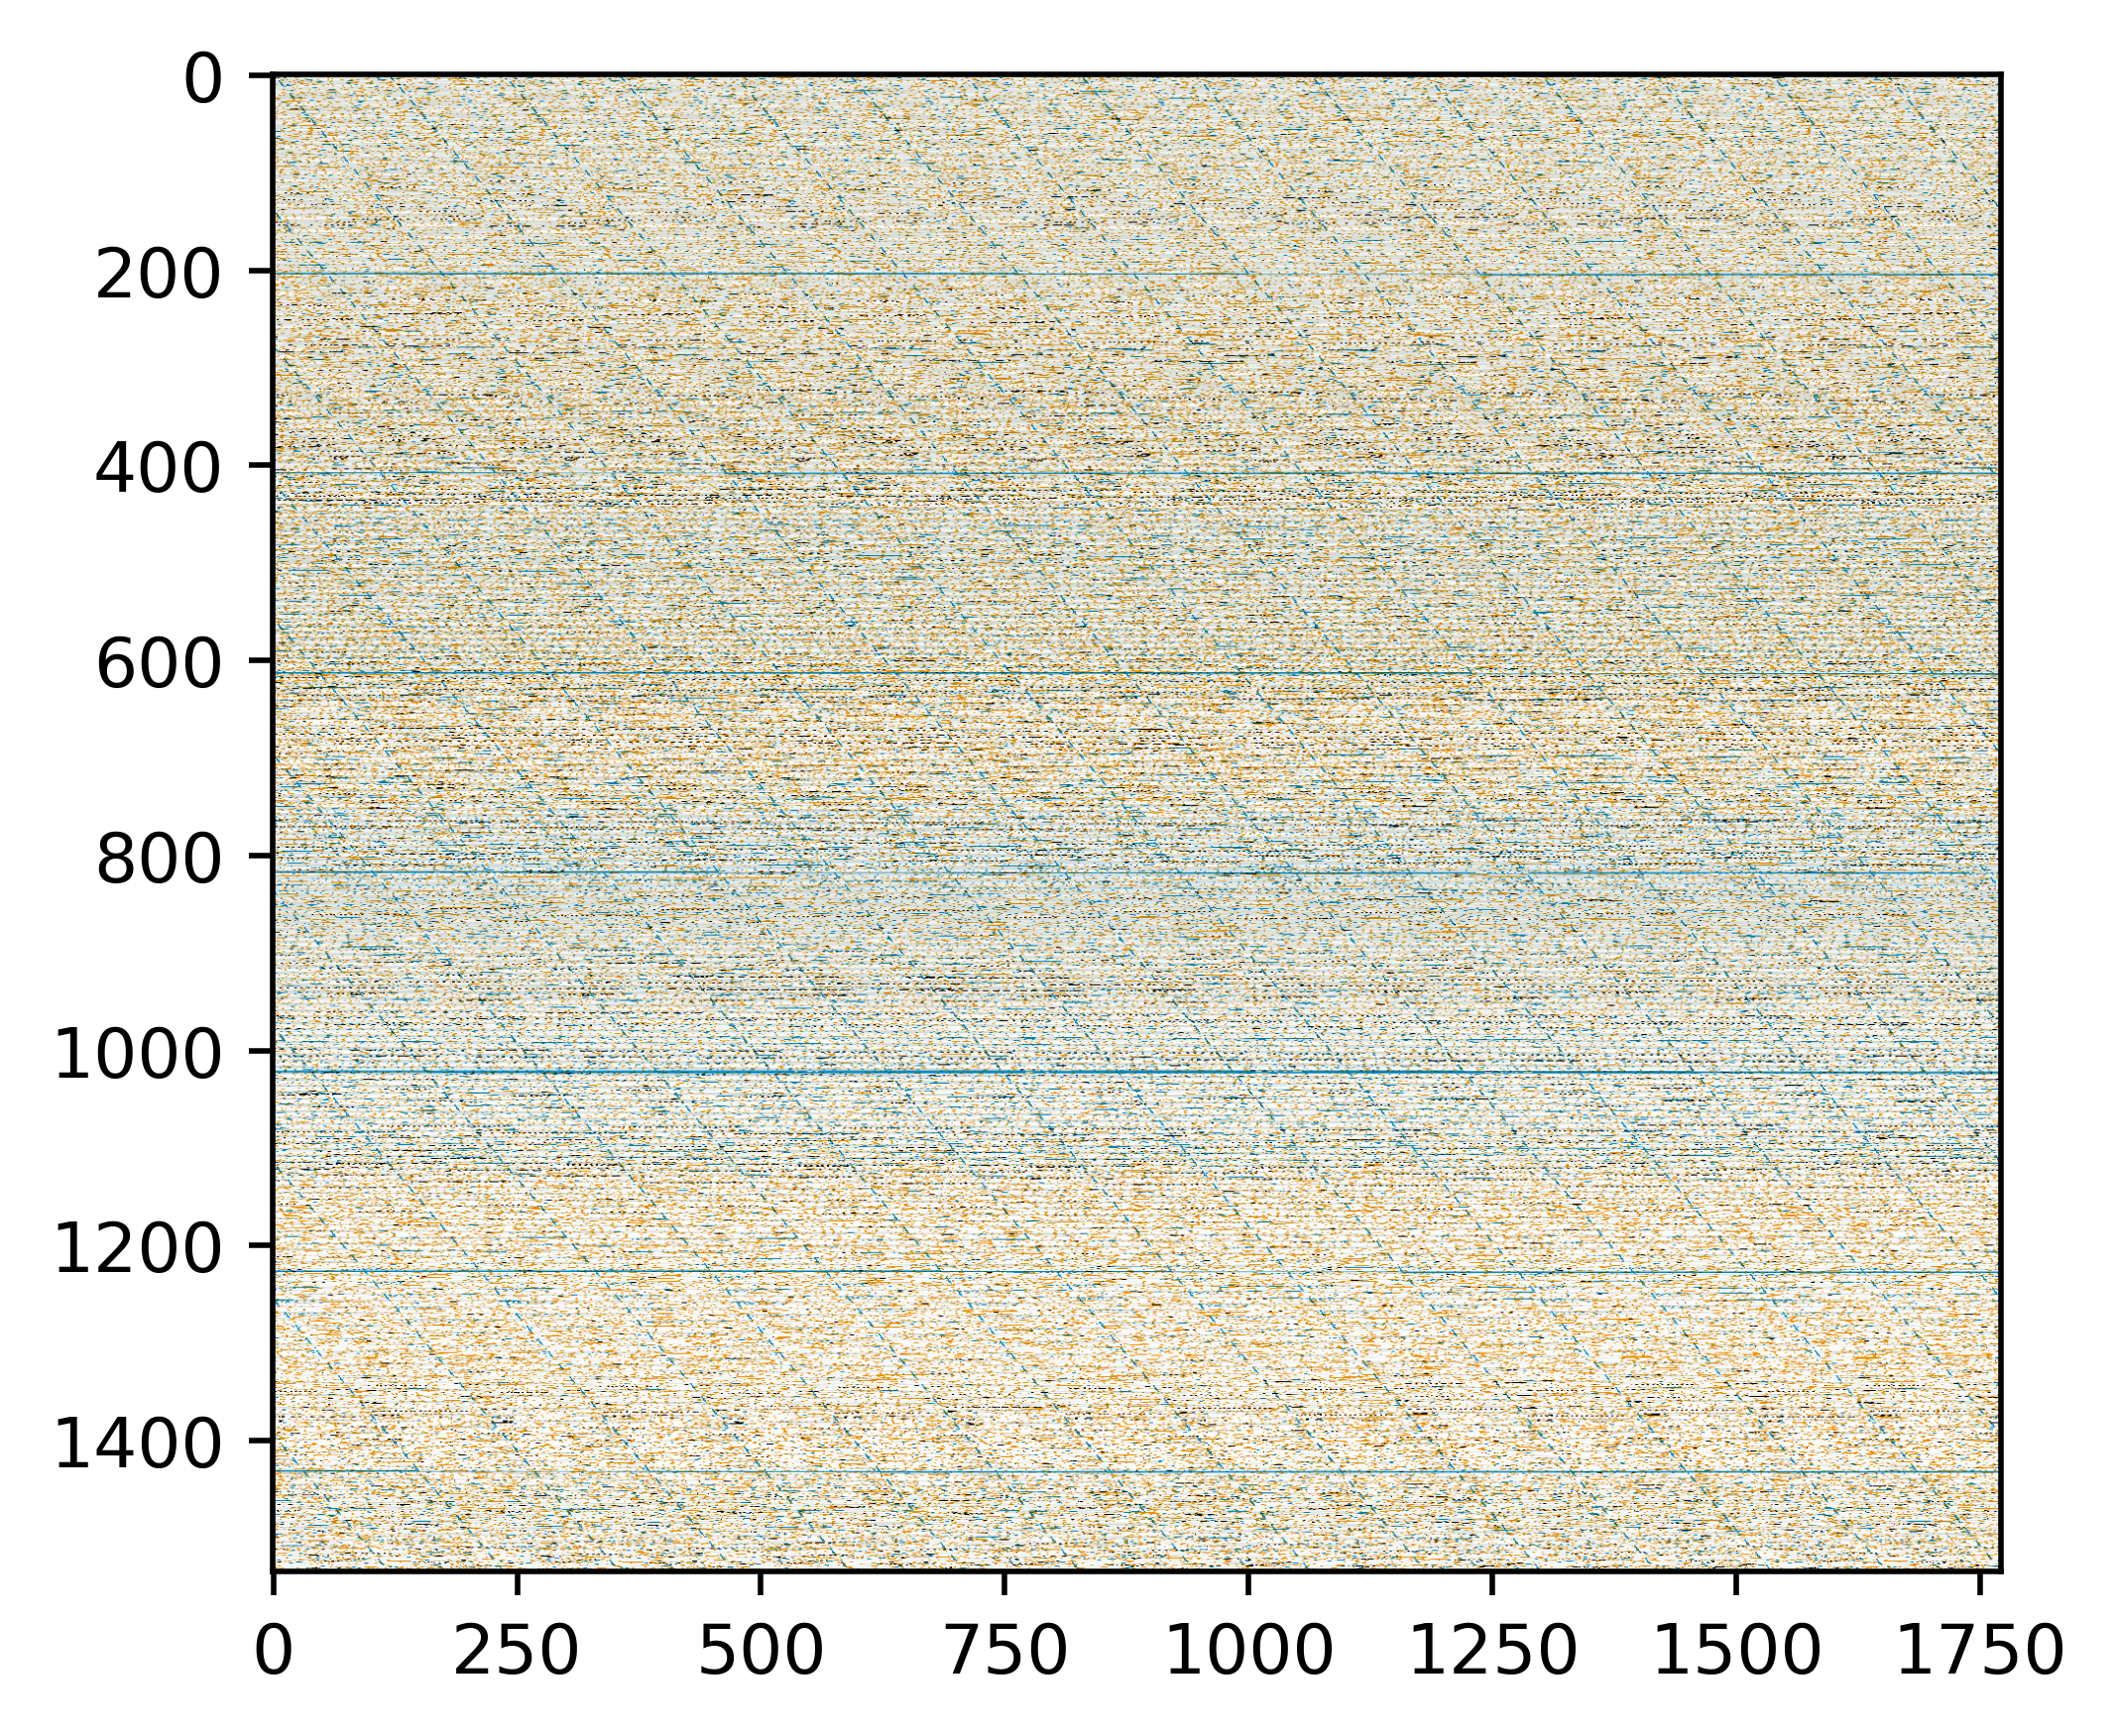

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 500

plt.imshow(topo_map.to_array())

Once you have a topography mesh loaded as a surface mesh (we use a
`pyvista.StructuredGrid`{.interpreted-text role="class"} here) and an
image loaded as a `pyvista.Texture`{.interpreted-text role="class"}
object using the `pyvista.read_texture`{.interpreted-text role="func"}
method, then you can map that imagery to the surface mesh as follows:


In [4]:
# Bounds of the aerial imagery - given to us
bounds = (1818000, 1824500, 5645000, 5652500, 0, 3000)
# Clip the elevation dataset to the map's extent
local = elevation.clip_box(bounds, invert=False)
# Apply texturing coordinates to associate the image to the surface
local.texture_map_to_plane(use_bounds=True, inplace=True)

UnstructuredGrid (0x1e23adc4700)
  N Cells:	436733
  N Points:	222110
  X Bounds:	1.818e+06, 1.825e+06
  Y Bounds:	5.645e+06, 5.653e+06
  Z Bounds:	1.381e+03, 2.787e+03
  N Arrays:	2

Now display it! Note that the imagery is aligned as we expect.


In [10]:
#local.plot(show_data=False, show_results=False, plotter_type='background')

local.plot(texture=topo_map, cpos="xy", notebook=False)

[(1818373.6869050565, 5655422.508836698, 20071.75579814779),
 (1821250.0, 5648752.5, 2084.1749267578125),
 (0.2893755302040903, -0.8814919311432557, 0.3731404264461777)]

And here is a 3D perspective!


In [ ]:
local.plot(texture=topo_map)

We could also display the entire region by extracting the surrounding
region and plotting the texture mapped local topography and the outside
area


In [ ]:
# Extract surrounding region from elevation data
surrounding = elevation.clip_box(bounds, invert=True)

# Display with a shading technique
p = pv.Plotter()
p.add_mesh(local, texture=topo_map)
p.add_mesh(surrounding, color="white")
p.enable_eye_dome_lighting()
p.camera_position = [(1831100., 5642142., 8168.),
                     (1820841., 5648745., 1104.),
                     (-0.435, 0.248, 0.865)]
p.show()